# **GLOBAL AI HUB**
### **Project 1: Medical Cost Analysis**

## Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


## Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)

## Exploratory Data Analysis

In [ ]:
data = pd.read_csv("insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 7)


In [ ]:
data = data.drop_duplicates()

In [ ]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


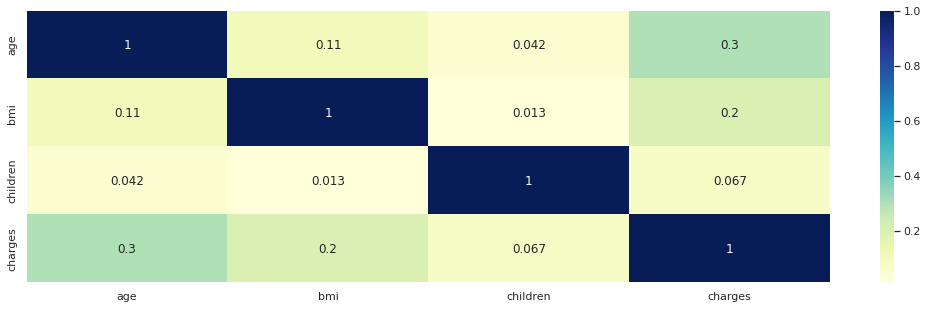

In [ ]:
fig = plt.figure(figsize = (18,5))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

# According to the correlation table, the strongest positive relationship is between "age" and "charges" variables.
# However, the relation is not strong enough since it is 0.3.

#### Distribution of Body Mass Index (BMI)

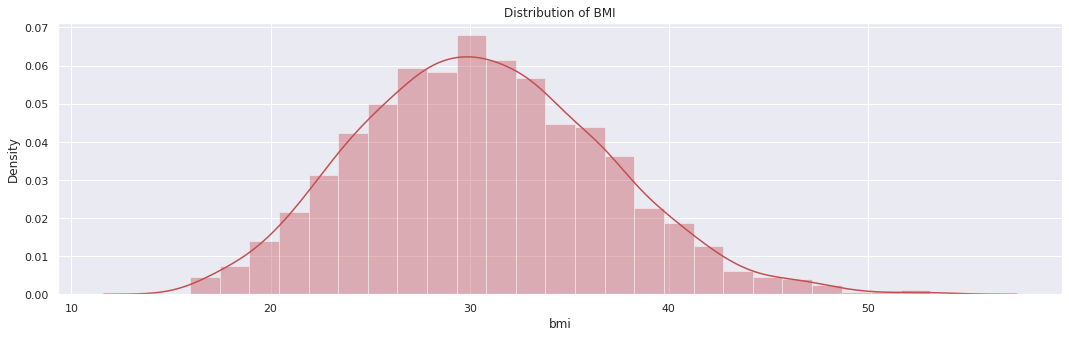

In [ ]:
fig = plt.figure(figsize = (18,5))
sns.distplot(a=data.bmi, color="r")
plt.title('Distribution of BMI')
plt.show()

# When we look at the distribution of the "bmi", we see that it is normally distributed around 30.

#### Relationship between “smoker” and “charges”

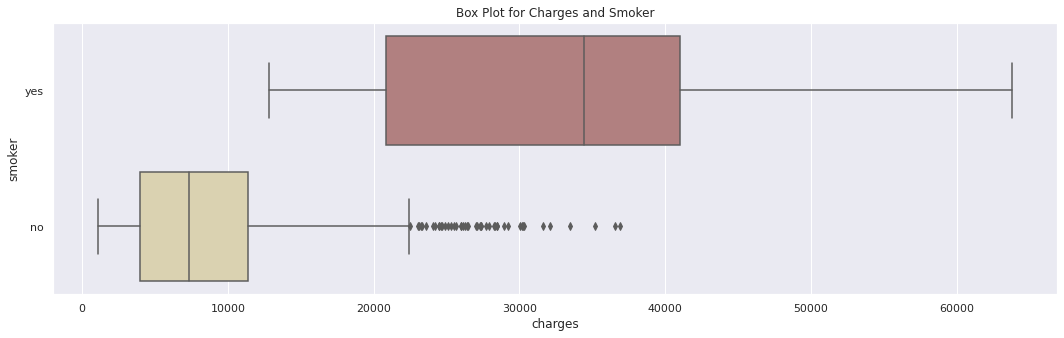

In [ ]:
fig = plt.figure(figsize = (18,5))
plt.title("Box Plot for Charges and Smoker")
sns.boxplot(y="smoker", x="charges", data = data, orient="h", palette = 'pink')

# As we expected, the "charges" of the smoker person are much higher than the non-smoker.

#### Relationship between “smoker” and “region”

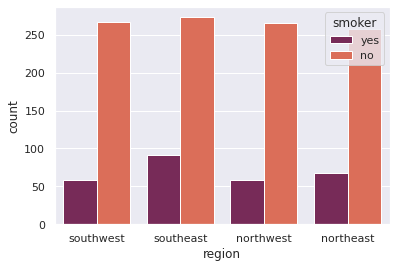

In [ ]:
sns.countplot(x="region",hue="smoker",data=data,palette="rocket")  
plt.show() 

# As a result of comparing the amounts of smokers and non-smokers, we see that the highest amount is in the "southeast" region for both 2 categories.

#### Relationship between “bmi” and “sex”

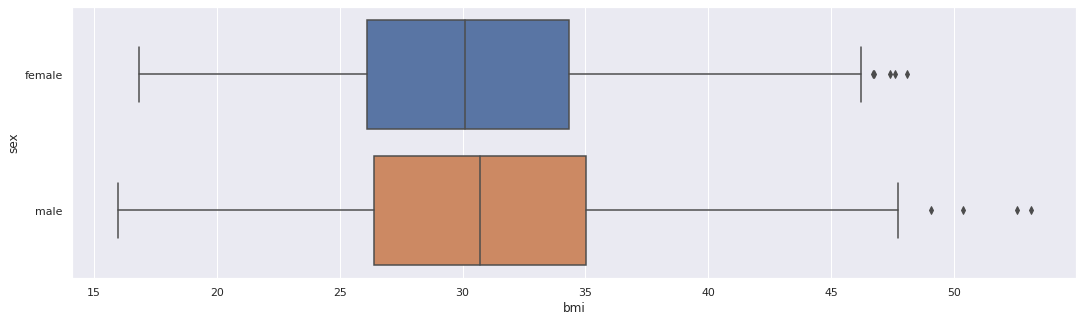

In [ ]:
fig = plt.figure(figsize = (18,5))
sns.boxplot(x=data['bmi'], y=data['sex'])

# On average, men have higher "bmi" than women.

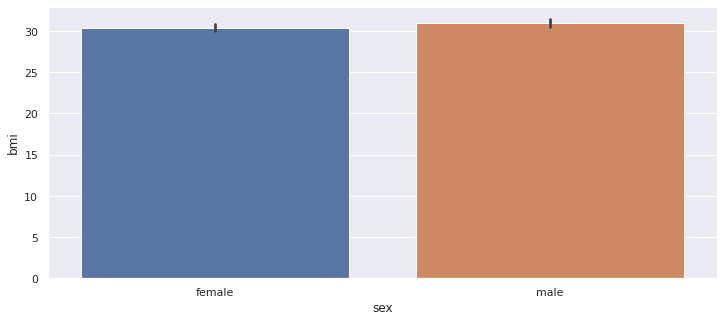

In [ ]:
fig = plt.figure(figsize = (12,5))
ax = sns.barplot(x="sex", y="bmi", data=data)

#### Find the "region" with the most "children".

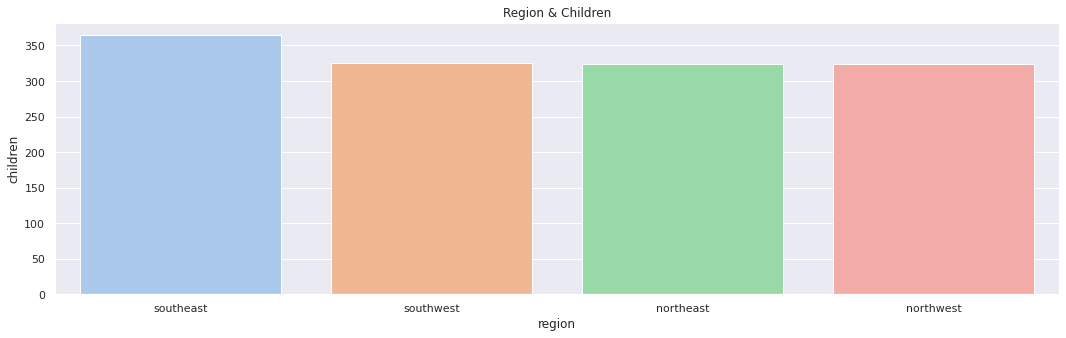

In [ ]:
plt.figure(figsize=(18,5))
df_child = data.groupby("region").agg({"children": "count"}).sort_values(by="children", ascending=False).reset_index()
g = sns.barplot(x=df_child["region"], y=df_child["children"],data=data, palette="pastel")
g.set_title("Region & Children")
plt.show()

# "southeast" is the region with the most "children". 

#### Relationship between “age” and “bmi” 

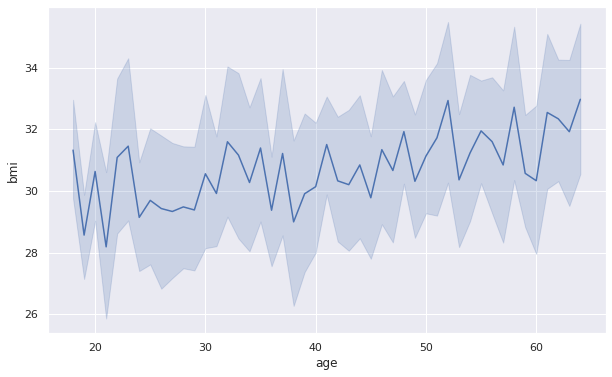

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=data, x="age", y="bmi")
ax.set_xlabel('age')
ax.set_ylabel('bmi')
plt.show()

# It seems that body mass index (bmi) increases with increasing age.

#### Relationship between “bmi” and “children”

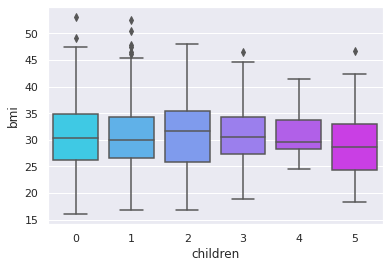

In [ ]:
sns.boxplot(x=data['children'], y=data['bmi'], palette="cool")

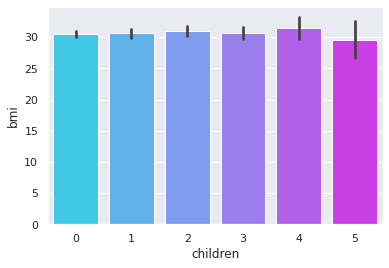

In [ ]:
sns.barplot(x="children", y="bmi", data=data, palette="cool")

# People with 4 children have the highest "bmi".

#### Are there any outliers in the "bmi" variable?

In [ ]:
data_bmi = data.loc[:, 'bmi']
data_bmi.describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [ ]:
fig = px.box(data, x= 'bmi', hover_data = data[['charges']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

# Yes, we can say that there are outliers in "bmi" since the existence of observations is beyond the maximum point.

#### Relationship between “bmi” and “charges”

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

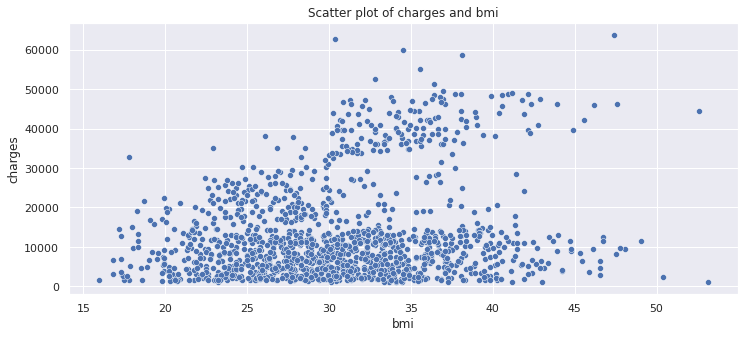

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.scatterplot(x='bmi',y='charges',data=data)
ax.set_title('Scatter plot of charges and bmi')

#### Relationship between "region”, “smoker” and “bmi”

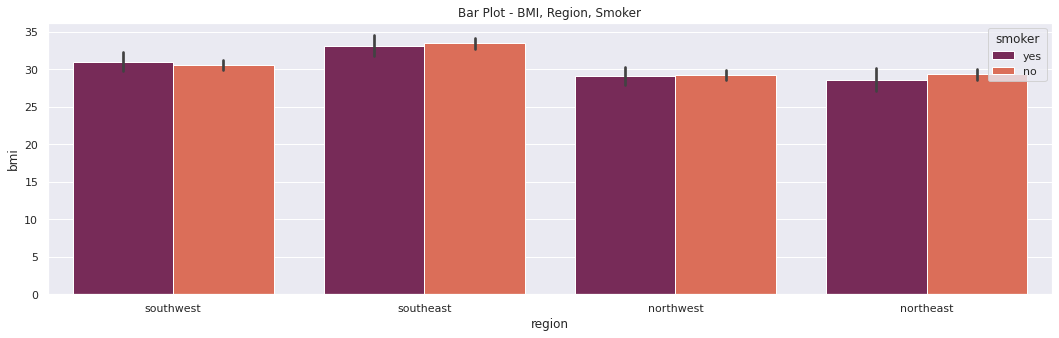

In [ ]:
plt.figure(figsize=(18,5))
g = sns.barplot(x="region", y="bmi", hue="smoker",data=data, palette="rocket")
g.set_title("Bar Plot - BMI, Region, Smoker")
plt.show()

# When we compare body mass index across regions, we see that people in the "southeast" have the highest "bmi" whether they smoke or not.

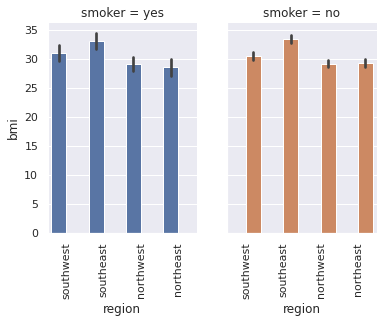

In [ ]:
g = sns.catplot(x="region", y="bmi",
                hue="smoker", col="smoker",
                data=data, kind="bar",
                height=4, aspect=.7);
g.set_xticklabels(rotation=90)

# We can see the same result in this graph.
# In addition, the region with the lowest "bmi" among smokers is "northeast", and "northwest" among non-smokers.

## Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Read Data
data = pd.read_csv('insurance.csv')

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
duplicate_rows_df = data[data.duplicated()]
print("Number of Duplicate Rows: ", duplicate_rows_df.shape)

Number of Duplicate Rows:  (1, 7)


In [ ]:
data = data.drop_duplicates()

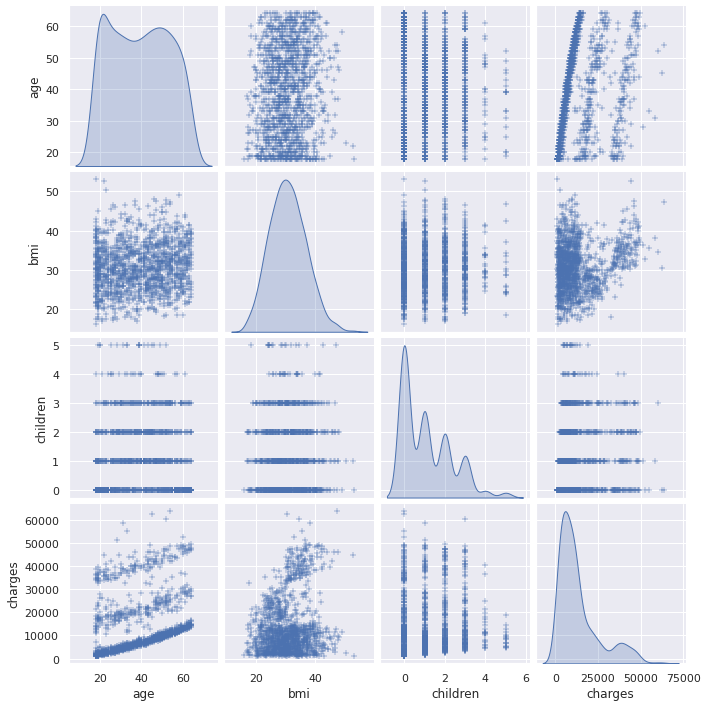

In [ ]:
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

# According to the below graphs, we can say that distribution of "age" is uniform, "bmi" is normal, and "children" is geometrical.
# Moreover, the "charges" variable has a right-skewed distribution means its mean is higher than its median.

#### Label Encoding

In [ ]:
# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

In [ ]:
# smoker
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#### One-Hot Encoding

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


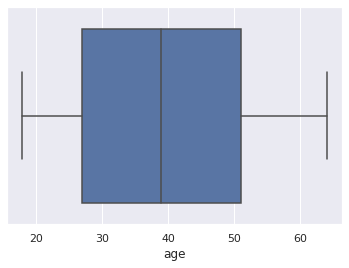

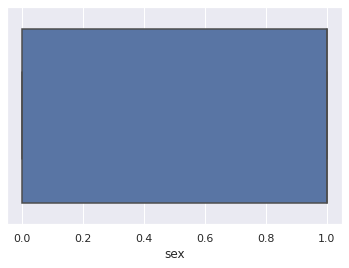

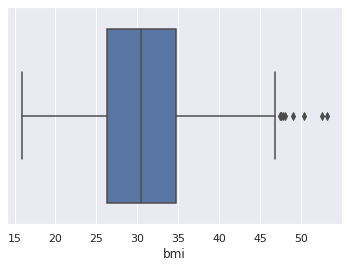

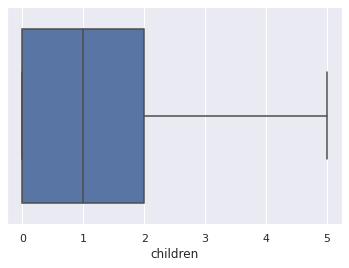

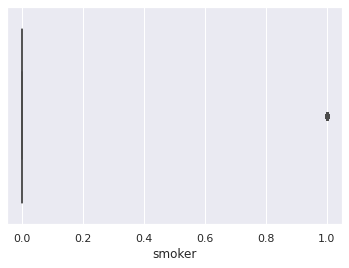

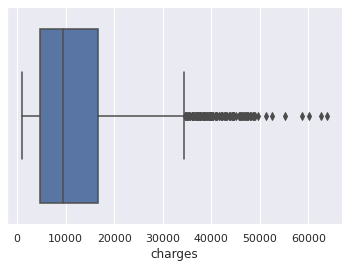

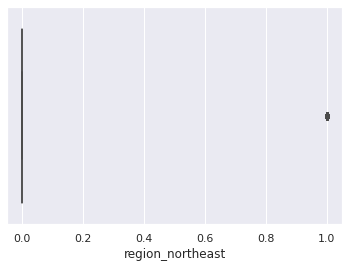

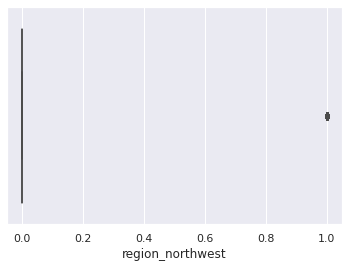

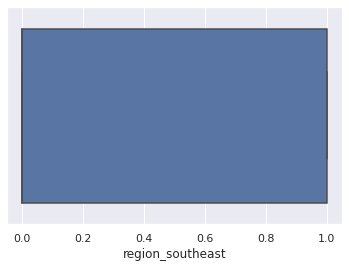

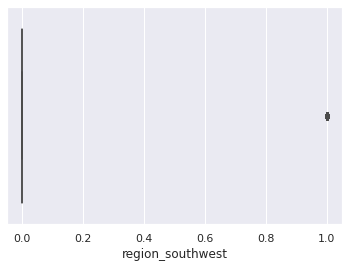

In [ ]:
# Box Plot
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")
plt.show()

# Now, we create box plots to see which variables have outliers.

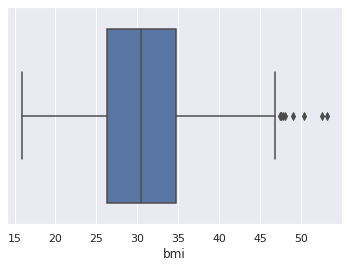

In [ ]:
sns.boxplot(x = 'bmi', data = data)
plt.show()

# The "bmi" variable has outliers, so we need to remove them to make a better prediction.

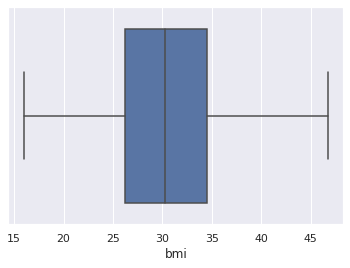

In [ ]:
describe = data.describe()
thr = 1.5
bmi_desc = describe["bmi"]
q3_hp = bmi_desc[6]
q1_hp = bmi_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["bmi"]
filter_hp_top = data["bmi"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top
data = data[filter_hp]
sns.boxplot(x = 'bmi', data = data)
plt.show()

# We removed outliers.

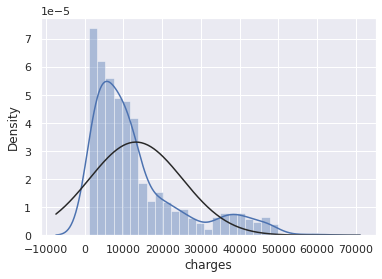

In [ ]:
# %% Feature Engineering
# Skewness

# target dependent variable
sns.distplot(data.charges, fit = norm)

# We knew that "charges" is right-skewed. However, to construct a better model, it should distribute like a black line.

mu: 13221.047809826054, sigma = 11993.029468713548


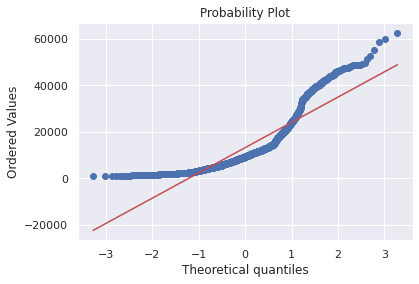

In [ ]:
(mu, sigma) = norm.fit(data["charges"])
print("mu: {}, sigma = {}".format(mu, sigma))

# Q-Q Plot
plt.figure()
stats.probplot(data["charges"], plot = plt)
plt.show()

# With the Q-Q Plot, we can analyze whether the residuals are normally distributed.
# In our examples, "charges" has no normal distribution since its residuals do not spread along the red line.

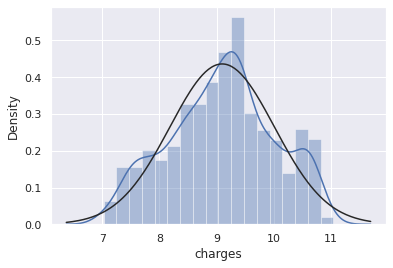

In [ ]:
data["charges"] = np.log1p(data["charges"]) 

plt.figure()
sns.distplot(data.charges, fit = norm)

# We got the normal distribution with the log1p()

mu: 9.098486269966314, sigma = 0.9151449336020344


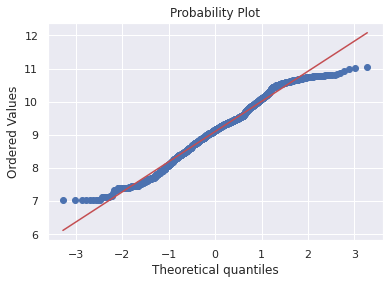

In [ ]:
(mu, sigma) = norm.fit(data["charges"])
print("mu: {}, sigma = {}".format(mu, sigma))

# Q-Q Plot
plt.figure()
stats.probplot(data["charges"], plot = plt)
plt.show()

# In this way, the distribution of residuals follows the red line more than before.

In [ ]:
# Feature - Independent Variable 
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])

#### Train-Test Split for Evaluating


In [ ]:
# Split
x = data.drop(["charges"], axis = 1)
y = data.charges

In [ ]:
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

#### Standardization

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection
#### Regression Models

In [ ]:
# Linear Regression

from sklearn.model_selection import cross_val_score

lr = LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef: ",lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE: ",mse)
print("Linear Regression Scoring: ",lr.score(X_test,Y_test))

LR Coef:  [ 4.85374903e-01 -4.59628114e-02  8.76711635e-02  1.34204981e-01
  6.21121497e-01  5.67503717e+12  5.88815084e+12  6.03717835e+12
  5.83756893e+12]
Linear Regression MSE:  0.18865573202671554
Linear Regression Scoring:  0.772790145946529


In [ ]:
mae = mean_absolute_error(Y_test, y_predicted_dummy)
print("Linear Regression MAE: ",mae)

cv_scores = cross_val_score(lr, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

Linear Regression MAE:  0.2706540086261905
Cross-Validation Scores:  [0.85342015 0.89358094 0.88977893 0.84512305 0.86546273]


In [ ]:
# Ridge Regression (L2)

ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5,30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)

Ridge Coef:  [ 0.48578522 -0.04678847  0.08623773  0.13446088  0.6214734   0.04379005
  0.01649436 -0.04044996 -0.017375  ]
Ridge Best Estimator:  Ridge(alpha=0.10404983103657853, max_iter=10000, random_state=42)
Ridge MSE:  0.18837613356495922


In [ ]:
mae = mean_absolute_error(Y_test, y_predicted_dummy)
print("Ridge MAE: ",mae)

cv_scores = cross_val_score(ridge, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

Ridge MAE:  0.269717124127076
Cross-Validation Scores:  [0.8543967  0.89280778 0.8897783  0.84513184 0.86542455]


Text(0.5, 1.0, 'Ridge')

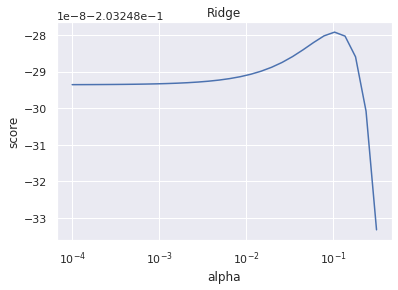

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

In [ ]:
# Lasso Regression (L1)

lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)

Lasso Coef:  [ 0.48575676 -0.0466836   0.08609988  0.13437893  0.62142324  0.06056549
  0.03389305 -0.02243353 -0.        ]
Lasso Best Estimator:  Lasso(alpha=0.0001, max_iter=10000, random_state=42)
Lasso MSE:  0.18834832123242545


In [ ]:
mae = mean_absolute_error(Y_test, y_predicted_dummy)
print("Lasso MAE: ",mae)

cv_scores = cross_val_score(lasso, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

Lasso MAE:  0.2696624942019579
Cross-Validation Scores:  [0.85439193 0.89280552 0.88979999 0.84511994 0.86542017]


Text(0.5, 1.0, 'Lasso')

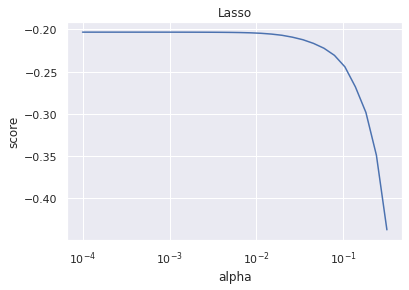

In [ ]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [ ]:
# ElasticNet

parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)


print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)


y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet Coef:  [ 0.4857759  -0.04674213  0.08617751  0.13442498  0.62145501  0.06063394
  0.03396588 -0.02245869 -0.        ]
ElasticNet Best Estimator:  ElasticNet(alpha=0.0001, l1_ratio=0.45, max_iter=10000, random_state=42)
ElasticNet MSE:  0.188364052213338


In [ ]:
mae = mean_absolute_error(Y_test, y_predicted_dummy)
print("ElasticNet MAE: ",mae)

cv_scores = cross_val_score(eNet, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

ElasticNet MAE:  0.2696924615253355
Cross-Validation Scores:  [0.28388388 0.29200116 0.30756493 0.23672794 0.30778823]


In [ ]:
# Random Forest Regression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

rforest =RandomForestRegressor()
rforest.fit(X_train, Y_train)

y_predicted_dummy = rforest.predict(X_test)
y_predicted_dummy = pd.DataFrame(y_predicted_dummy)
MAE_forest_reg= metrics.mean_absolute_error(Y_test, y_predicted_dummy)
MSE_forest_reg = metrics.mean_squared_error(Y_test, y_predicted_dummy)
RMSE_forest_reg = np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

# Among the regression models, the random forest has the minimum Mean Absolute Error (MAE) and minimum Mean Squared Error (MSE).

,Metrics
MAE_forest_reg,0.204732
MSE_forest_reg,0.174898
RMSE_forest_reg,0.418208


In [ ]:
cv_scores = cross_val_score(rforest, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

# It also has the maximum Cross-Validation values.

Cross-Validation Scores:  [0.91215451 0.89914638 0.92007748 0.90142821 0.90127347]


As a result of all these analyses, we decided to choose Random Forest, which showed the best performance.

## Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyper-Parameter Optimization of Random Forest Regression

# create the grid
n_estimators = [10, 100, 1000, 2000]
max_depth = [None, 5, 10, 20]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [ ]:
# create the default model
rforest =RandomForestRegressor()

# search the grid
grid = GridSearchCV(estimator=rforest, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [ ]:
grid_result.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [ ]:
grid_result.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [ ]:
grid_result.best_score_

0.8298410108450295

## Model Evaluation


In [ ]:
new_forest = RandomForestRegressor(n_estimators = 1000, max_depth = 5)
new_forest.fit(X_train, Y_train)

y_predicted_dummy = new_forest.predict(X_test)
y_predicted_dummy = pd.DataFrame(y_predicted_dummy)

In [ ]:
cv_scores = cross_val_score(new_forest, X_train, Y_train, cv=5)
print("Cross-Validation Scores: ",np.sqrt(cv_scores))

Cross-Validation Scores:  [0.90247617 0.92112873 0.92951075 0.90041647 0.90732459]


In [ ]:
# Mean Absolute Error (MAE)
metrics.mean_absolute_error(Y_test,y_predicted_dummy)

0.18936363662968847

In [ ]:
# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(Y_test,y_predicted_dummy)
mse

0.14224045899290863

In [ ]:
# Root Mean Squared Error (RMSE)
metrics.mean_squared_error(Y_test,y_predicted_dummy)

0.14224045899290863

In [ ]:
# Coefficient of Determination (R^2)
metrics.r2_score(Y_test,y_predicted_dummy)

0.8286909516022503

In [ ]:
# Adjusted R^2
var_test = Y_test.var()
Adj_rsquare = 1-(mse/var_test)
Adj_rsquare

# Adjusted R^2 is 82.8 which means that 82.8% of variations in "charges" are explained by variations of the regressors.
# Actually, it is large enough to perfectly predicts values.

0.8291202975882096

⭐ After optimizing the random forest model with 1000 estimators and 5 depth, we obtained lower MAE, MSE, and RMSE values. Moreover, cross-validation scores have also increased.